# KNN

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold     
from matplotlib import  pyplot as plt

data1 = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/2nd/Cleaned Sub-sample-Nancy.csv")

In [17]:
X=data1.drop(columns="July_Payment_Status")
y=data1["July_Payment_Status"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=30)

In [18]:
X_fsvar = VarianceThreshold(np.median(Xtrain.var().values)).fit_transform(X)

In [19]:
print(cross_val_score(KNN(), X, y, cv=5).mean())
print(cross_val_score(KNN(), X_fsvar, y, cv=5).mean())     

0.5840356677909935
0.5833813866839119


In [20]:
knn = KNN(n_neighbors=3)

knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = knn.predict(Xtest)
knn.score(Xtest,Ytest)

0.5621516840319845

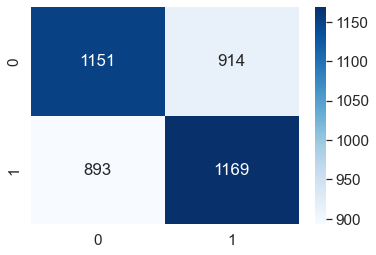

In [22]:
cm = confusion_matrix(Ytest, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [23]:
print(classification_report(Ytest, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.563112  0.557385  0.560234      2065
           1   0.561210  0.566925  0.564053      2062

    accuracy                       0.562152      4127
   macro avg   0.562161  0.562155  0.562143      4127
weighted avg   0.562161  0.562152  0.562142      4127

